<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО:** Земцов Денис Романович

**id из контеста:** 

## Общая информация


__Дата выдачи:__ 17.05.2023

__Мягкий дедлайн:__ 23:59MSK 09.06.2023

__Жесткий дедлайн:__ 23:59MSK 16.06.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [2]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [3]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [5]:
df = pd.read_csv('/content/students_exam.csv', delimiter = '\,')

In [6]:
df.columns = df.columns.str.strip('"')

In [7]:
df = df.apply(lambda x: x.str.strip('"'), axis = 1) #Обрезал некрасивые кавычки
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

<Axes: >

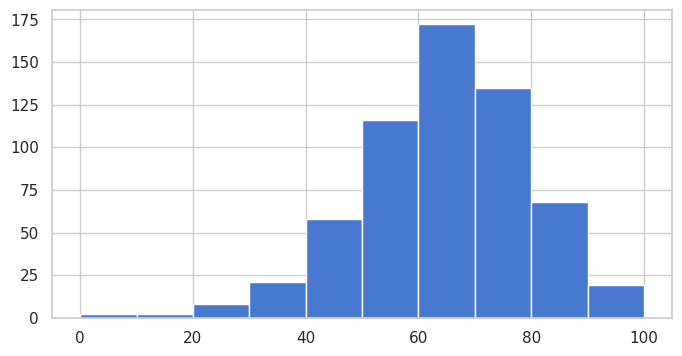

In [8]:
# your code here
# (⌒_⌒)
df[['reading score', 'writing score', 'math score']] = df[['reading score', 'writing score', 'math score']].astype('float')
educ = "parental level of education"
high = df[(df[educ] == "associate's degree") | 
          (df[educ] == "bachelor's degree") |
          (df[educ] == "master's degree")]
low = df.drop(high.index)
low['math score'].hist()

<Axes: >

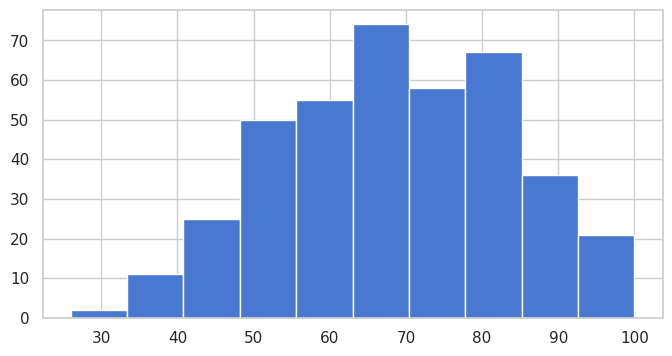

In [9]:
high['math score'].hist() #Рисую вспомогательные графики

In [10]:
res = sts.ttest_ind(high['math score'], low['math score'], alternative = 'greater', equal_var = False)
print(res[1])

9.155018364116071e-06


Получается, что мы отвергаем нулевую гипотезу в пользу H1

наблюдение: parental education это уровень образования родителей

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ я выбрал t_test так как данных достаточное количество для того, чтобы использовать цпт и выбросов в данных практически нет, однако дисперсии выборок могут быть равны, но я использовал тест, который предпринимает, что дисперсии не равны. Это единственная предпосылка, которая может не выполнится.


__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [11]:
# your code here

mat_data = df['math score']
read_data = df['reading score']

res = sts.ttest_ind(mat_data, read_data, equal_var = False, alternative = 'two-sided')
print(res[1] > 0.05)

False


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Тот же самый критерий, только граница поиска другая. Использую его, так как дисперсии неизвестны

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [12]:
df = pd.read_csv('/content/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

In [13]:
df

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534
...,...,...,...,...,...
286,2,20,1,1.0,NaN
287,2,21,1,1.0,NaN
288,2,19,0,0.0,NaN
289,2,21,0,1.0,NaN


__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [14]:
# your code here
# (￢_￢) 
print((df[df['STUDY'] == 1]['DECISION'].sum(), len(df[df['STUDY'] == 1])), (df[df['STUDY'] == 2]['DECISION'].sum(), len(df[df['STUDY'] == 2])))
from statsmodels.stats.proportion import proportions_ztest
res = proportions_ztest([df[df['STUDY'] == 1]['DECISION'].sum(), df[df['STUDY'] == 2]['DECISION'].sum()],
                        nobs = [len(df[df['STUDY'] == 1]), len(df[df['STUDY'] == 2])],
                        alternative = 'larger', value = 0)
print(res[1] > 0.05)

(166.0, 192) (62.0, 83)
False


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Выбрал такой критерий, потому что в выборках достаточное количество для перехода в асимптотику, также потому что дисперсии не равны, а при n -> $\infty$, количество успехов принимает нормальное распределение

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

<Axes: >

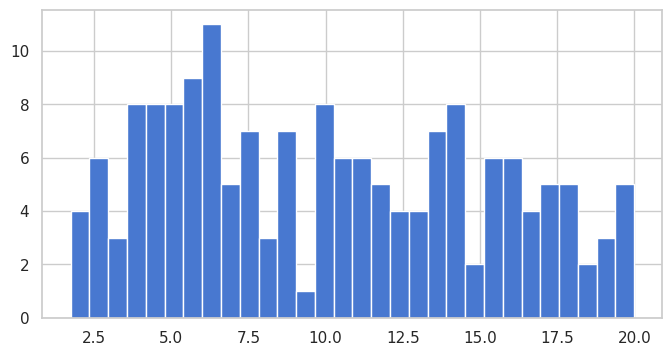

In [15]:
# your code here
# (⊙_⊙)
timing = df[(df['STUDY'] == 1) & (df['DECISION']) == 1]
timing['RT'].hist(bins = 30)
#Вспомогательный график



In [16]:
res = sts.ttest_1samp(timing['RT'], popmean = 5, alternative = 'less')
res[1] > 0.05

True

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Выбрал такой критерий, потому что в выборках достаточное количество для перехода в асимптотику, также, t_test достаточно устойчив к использованию ненормальных распределений, по сравнению с z_test'ом.
Также Гипотеза о том, что люди некровожадны(H0: $\mu >= 5$) не отвергается, так как альтернатива о том, что $\mu\ < 5$, не является статистически не отвергнутой. на уровне $\alpha = 0.05$

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [17]:
# your thoughts here  
# (◕‿◕)♡
treat_p = 770/(770+880)
control_p = 88/(88+135)
print(treat_p, control_p)

0.4666666666666667 0.39461883408071746


Доля выдоровевших мужчин, которые принимали лекарство больше аналогичной, для тех, кто не принимал лекарство, но меньше 0.5. Разница в то же время, всего 0.072, что достаточно мало.

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [18]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [19]:
# your code here
# (￢_￢) 
result = sts.chi2_contingency(men, correction = False)
print(result[1])
result[1] > 0.05 #значит отвергаем Нулевую гипотезу => эффекта от лекарства для мужчин нет

0.04268446899604581


False

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [20]:
# your code here
# (￢_￢) 
n = np.sum(men)
n

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [21]:
# your code here
# (￢_￢) 
n1 = np.sum(men[0])
n2 = np.sum(men[1])
print(n1, n2)

1650 223


Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [22]:
# your code here
# (￢_￢) 
p_cure = np.sum(men[:,0])/n 
p_ill = 1 - p_cure
print(p_cure, p_ill)

0.4580886278697277 0.5419113721302723


Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [23]:
# your code here
# (￢_￢) 

chi2matrix = np.dot(np.array([[n1], [n2]]),np.array([[p_cure, p_ill]]))
chi2matrix

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [24]:
# your code here
# (￢_￢) 
stat = np.sum(((men - chi2matrix)**2) / chi2matrix) # статистика
pval = 1 - sts.chi2.cdf(stat, df = 1) # pvalue
print(pval)

0.04268446899604583


__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [25]:
# your code here
# (￢_￢)
women = np.array([[165, 80],[440,310]])
treat = women[0, 0] / np.sum(women[0])
control = women[1, 0] / np.sum(women[1])
print(treat, control)

0.673469387755102 0.5866666666666667


У женщин доля выздоровевших больше

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [26]:
# your code here
# (￢_￢) 
sts.chi2_contingency(women, correction = False)[1] > 0.05

False

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [27]:
# your code here
# (￢_￢) 
all = men+women
treat = all[0, 0] / np.sum(all[0])
control = all[1, 0] / np.sum(all[1])
print(treat, control)
sts.chi2_contingency(all, correction = False, )[1] > 0.05 #гипотеза о том, что лекарство делает хуже отвергнута

0.49340369393139843 0.5426515930113053


False

Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

### Нет не соотносится, так как везде Гипотеза о ПОЛОЖИТЕЛЬНОМ эффекте отвергалась, у мужчин и у женщин отдельно, однако, у всех вместе ситуация обратная => гипотеза, что лекарство имеет ОТРИЦАТЕЛЬНЫЙ эффект, отвергается

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [28]:
# your code here
# (♡-_-♡) 
sigma_a = 20
mu_a = 100
mde = 5
alpha = 0.05
beta = 0.2
sigma_b = 20
n_one_group = ((sigma_a**2 + sigma_b**2)*(sts.norm.ppf(1 - alpha/2) + sts.norm.ppf(1 - beta))**2) / (mde)**2
days = (n_one_group*2)//200 + int(bool((n_one_group*2)%200))
print(n_one_group, days)

251.16415149917083 3.0


__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [29]:
# your code here
# ヽ(♡‿♡)ノ
A = sts.norm.rvs(size = 100, loc = 100, scale = 20) #Это за день, так как 100 на группу А и 100 на группу Б => 200 в сумме
B = sts.norm.rvs(size = 100, loc = 105, scale = 20)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [30]:
from numpy.random.mtrand import randint
# your code here
# (´｡• ᵕ •｡`) 
def get_df_test(n_days, state):
  X_b = np.empty(1)
  X_a = np.empty(1)
  data = []
  for i in range(n_days):
    Xaday = sts.norm.rvs(size = 100, loc = 100, scale = 20, random_state = i+4+state)
    Xbday = sts.norm.rvs(size = 100, loc = 105, scale = 20, random_state = i+242*state)
    X_b = np.append(X_b, Xbday)
    X_a = np.append(X_a, Xaday)
    data.append([X_a.mean(), X_b.mean(), sts.ttest_ind(X_a, X_b, equal_var = True)[1]])
  return(pd.DataFrame(data, columns = ['A_mean', 'B_mean', 'p_value']))
df = get_df_test(50, 8867)

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

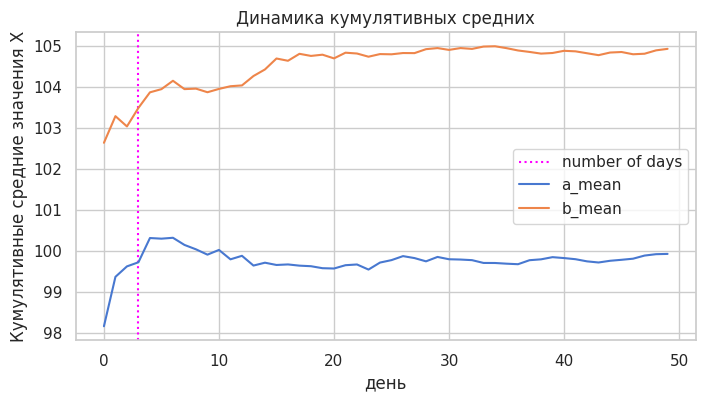

In [31]:
# your code here
# (´｡• ᵕ •｡`) 
plt.axvline(x = days, color = 'magenta', linestyle = 'dotted', label = 'number of days')
plt.plot(df.index, df['A_mean'], label = 'a_mean')
plt.plot(df.index, df['B_mean'], label = 'b_mean')
plt.title('Динамика кумулятивных средних')
plt.legend()
plt.xlabel('день')
plt.ylabel('Кумулятивные средние значения X')
plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

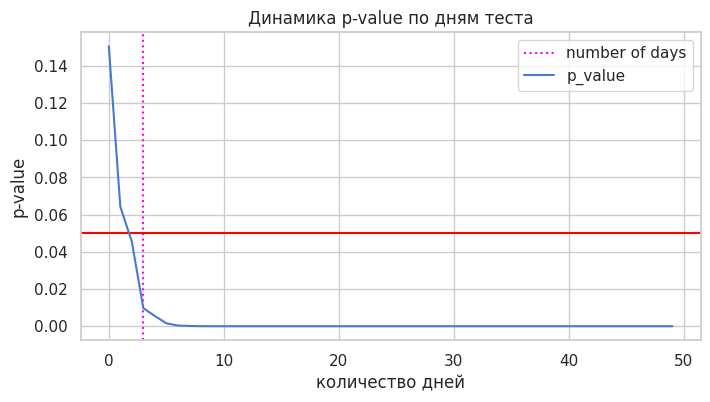

In [32]:
# your code here
# (´｡• ᵕ •｡`) 
plt.axvline(x = days, color = 'magenta', linestyle = 'dotted', label = 'number of days')
plt.axhline(y = alpha, color = 'red')
plt.plot(df.index, df['p_value'], label = 'p_value')
plt.title('Динамика p-value по дням теста')
plt.xlabel("количество дней")
plt.ylabel('p-value')
plt.legend()
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

###1. В начале теста pvalue обычно принимает достаточно высокие значения, часто сильно выше, чем уровень значимости, это возможно обусловлено недостаточным размером выборки, для установления статистически значимого различия. До точки 3 дней А/Б теста p-value каждый раз строго убывает и в последний день теста значение p-value, как правило, составляет < 0.02. После последнего дня теста изменения p-value лежат в пределах его значения на 3-ий день теста, что означает, что предел p-value достигается на третий день. Асимптотически, p-value стремится к нулю.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [36]:
# your code and thoughts here
# ♡ (´｡• ω •｡`) ♡
states = 1557
print(states)
def get_df_test(n_days, state):
  X_b = np.empty(1)
  X_a = np.empty(1)
  data = []
  for i in range(n_days):
    Xaday = sts.norm.rvs(size = 100, loc = 100, scale = 20, random_state = i+state)
    Xbday = sts.norm.rvs(size = 100, loc = 101, scale = 20, random_state = i+2+2*state)
    X_b = np.append(X_b, Xbday)
    X_a = np.append(X_a, Xaday)
    data.append([X_a.mean(), X_b.mean(), sts.ttest_ind(X_a, X_b, equal_var = True)[1]])
  return(pd.DataFrame(data, columns = ['A_mean', 'B_mean', 'p_value']))
df = get_df_test(50, states)

1557


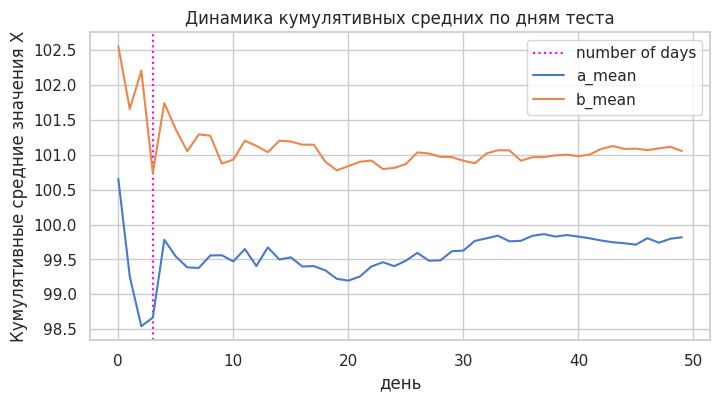

In [37]:
plt.axvline(x = days, color = 'magenta', linestyle = 'dotted', label = 'number of days')
plt.plot(df.index, df['A_mean'], label = 'a_mean')
plt.plot(df.index, df['B_mean'], label = 'b_mean')
plt.title('Динамика кумулятивных средних по дням теста')
plt.legend()
plt.xlabel('день')
plt.ylabel('Кумулятивные средние значения X')
plt.show()

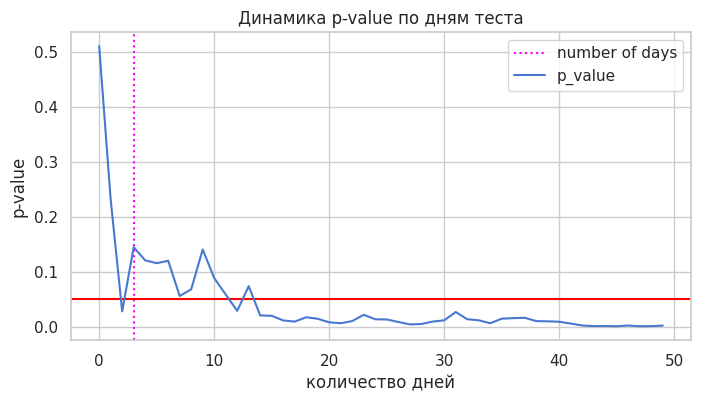

In [38]:
plt.axvline(x = days, color = 'magenta', linestyle = 'dotted', label = 'number of days')
plt.axhline(y = alpha, color = 'red')
plt.plot(df.index, df['p_value'], label = 'p_value')
plt.title('Динамика p-value по дням теста')
plt.xlabel("количество дней")
plt.ylabel('p-value')
plt.legend()
plt.show()

По своей сути, происходит то же самое, однако количество дней, необходимое для достижение предела гораздо больше, и модуль итоговых отклонений также больше, чем для меньшего MDE.

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [39]:
# your code and thoughts here
# ♡ (´｡• ω •｡`) ♡
states = 1709
print(states)
def get_df_test(n_days, state):
  X_b = np.empty(1)
  X_a = np.empty(1)
  data = []
  for i in range(n_days):
    Xaday = sts.norm.rvs(size = 100, loc = 100, scale = 20, random_state = i+state)
    Xbday = sts.norm.rvs(size = 100, loc = 100, scale = 20, random_state = i+2+22222*state)
    X_b = np.append(X_b, Xbday)
    X_a = np.append(X_a, Xaday)
    data.append([X_a.mean(), X_b.mean(), sts.ttest_ind(X_a, X_b, equal_var = True)[1]])
  return(pd.DataFrame(data, columns = ['A_mean', 'B_mean', 'p_value']))
df = get_df_test(50, states)

1709


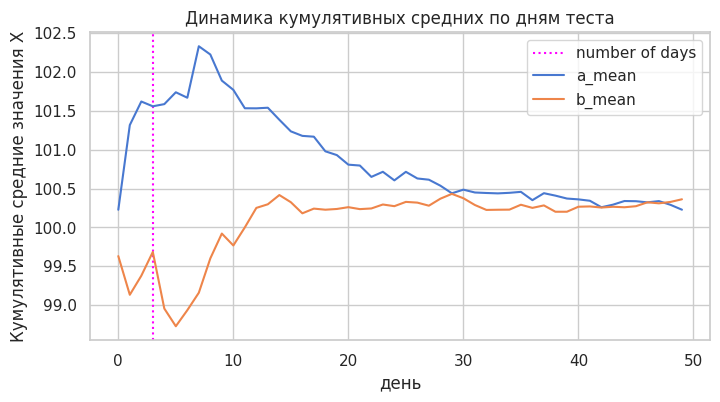

In [40]:
plt.axvline(x = days, color = 'magenta', linestyle = 'dotted', label = 'number of days')
plt.plot(df.index, df['A_mean'], label = 'a_mean')
plt.plot(df.index, df['B_mean'], label = 'b_mean')
plt.title('Динамика кумулятивных средних по дням теста')
plt.legend()
plt.xlabel('день')
plt.ylabel('Кумулятивные средние значения X')
plt.show()

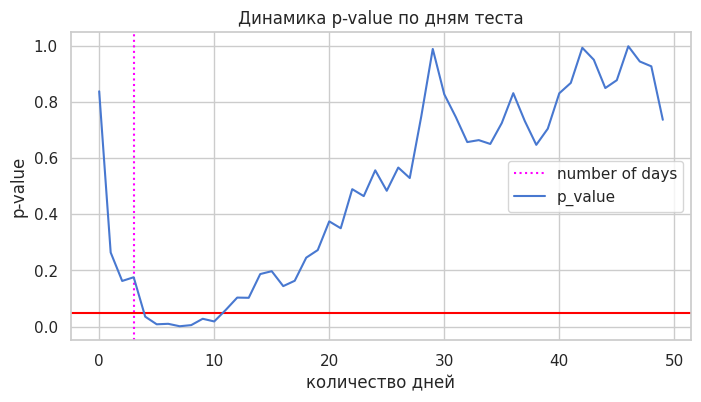

In [41]:
plt.axvline(x = days, color = 'magenta', linestyle = 'dotted', label = 'number of days')
plt.axhline(y = alpha, color = 'red')
plt.plot(df.index, df['p_value'], label = 'p_value')
plt.title('Динамика p-value по дням теста')
plt.xlabel("количество дней")
plt.ylabel('p-value')
plt.legend()
plt.show()

Да, p-value может оказаться ниже уровня значимости, так как данные выборки из одной генеральной совокупности, p-value должно быть равномерно распределено от 0 до 1. и общих трендов в данном случае у p-value не наблюдается, кроме того, что при большем количестве итераций, гипетоза о том, что разница матожиданий равно нулю принимается.

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [48]:
# your code and thoughts here
# C (・_・)ノ

def get_pval(n_days, random_state):
  Xaday = sts.norm.rvs(size = 100*n_days, loc = 100, scale = 20, random_state = 3 + random_state*22)
  Xbday = sts.norm.rvs(size = 100*n_days, loc = 100, scale = 20, random_state = 79999*random_state)
  pvalue = sts.ttest_ind(Xaday, Xbday, equal_var = True)[1]
  return(pvalue)
data = []
for i in range(1000):
  data.append(get_pval(3, i))
print(data)

[0.800356113903435, 0.9859461544896944, 0.9926718984741115, 0.7118669232427397, 0.2800420457955994, 0.2808341606933254, 0.7399340403761496, 0.6742552687005017, 0.5608525925429564, 0.0463311025198437, 0.05707687502444186, 0.15391888942738802, 0.8583524173547842, 0.5500932653397798, 0.01975180086946634, 0.9467799710636928, 0.01694493581291462, 0.9970274957196101, 0.41646989752168917, 0.12815847380061296, 0.3652601317581433, 0.720952377546326, 0.34289615222001024, 0.39709995325631076, 0.9333737156497359, 0.9243543109210655, 0.01936602425189928, 0.5732657979210782, 0.11931241045741055, 0.44523356742328213, 0.5579250280419451, 0.8325317230848485, 0.8948281070952919, 0.3977603477148739, 0.33656616969458875, 0.02752743344592596, 0.6835761211449377, 0.026724764674225337, 0.5134996309566708, 0.9254737812944411, 0.13447658139791788, 0.010215900342943087, 0.6115199658270576, 0.8022309403174498, 0.005327892863773876, 0.7546440145241251, 0.7328166512035751, 0.8881888363610946, 0.6183121334145081, 0

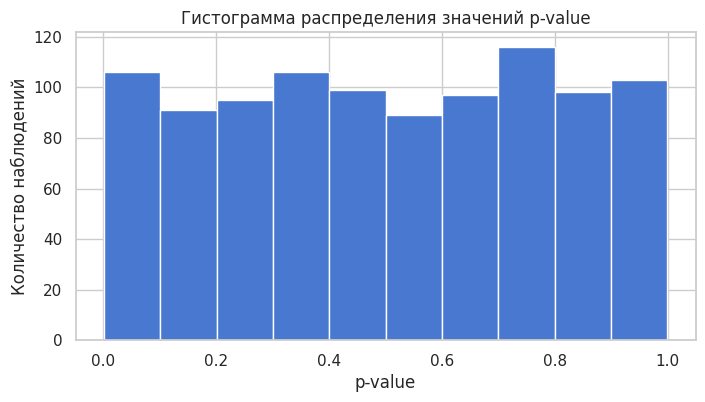

In [49]:
plt.hist(data)
plt.title('Гистограмма распределения значений p-value')
plt.xlabel('p-value')
plt.ylabel('Количество наблюдений')
plt.show()

Данное распределение очень похоже на равномерное, что ожидаемо, так как в целом разницы между выборками нет и оно полностью случай, так как вероятность попадания каждого p-value в промежуток от 0 до 1 одинаковая.